# Cost Function of the Logistic Regression Neural Network Analysis

In [1]:
using NBInclude
@nbinclude("Iris_Binary.ipynb");
@nbinclude("Visualization.ipynb");
@nbinclude("LogRegNN.ipynb");

### Iris Binary Subset

In [2]:
X, Y = get_binary_iris();

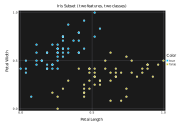

In [3]:
visualize_dataset( X[:, 1], X[:, 2], Y,
    "Iris Subset (two features, two classes)", "Petal Length", "Petal Width" )

### LogRegNN using Gradient Descent

In [4]:
""" Parameters """
α = 0.001; ITERS = 300; λ = 0.005;
range = -0.01:0.001:0.01
HIDDEN_SIZE = 2
W1 = rand(range, 2, HIDDEN_SIZE )
b1 = zeros((1, HIDDEN_SIZE))
W2 = rand(range, HIDDEN_SIZE, 1 )
b2 = 0.0;

In [5]:
loss_history, pred_class, W1, b1, W2, b2, W2_history, i = train_LogRegNN_GD(
    W1, b1, W2, b2, ITERS, α, λ, Y
);

In [6]:
W2_history

2×300 Array{Float64,2}:
 0.005  0.00453093  0.00408321  …  0.00561891  0.00562243  0.00562593
 0.009  0.00851391  0.00803778     0.00599409  0.00599747  0.00600085

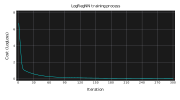

In [7]:
visualize_training_process( ITERS, loss_history,
    "LogRegNN training process", "Iteration", "Cost (LogLoss)")

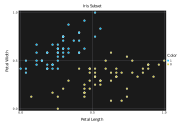

In [8]:
visualize_dataset( X[:,1], X[:,2], pred_class,
"Iris Subset", "Petal Length", "Petal Width")

### Visualization of Gradient Descent (last two weights)

In [9]:
SPAN = 300; LEFT = -0.005; RIGHT = 0.02
W2_ax = LinRange( LEFT, RIGHT, SPAN );

levels = [LinRange(0, 4, 20)...];

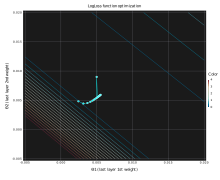

In [10]:
contour_cost(
    W2_ax, W2_ax,
    (x, y) -> cost_for_W2(x, y, Y), levels,
    W2_history, 20,
    "LogLoss function optimization",
    "Θ1 (last layer 1st weight)",
    "Θ2 (last layer 2nd weight)",
)

In [11]:
W2 # final (best) weights

2×1 Array{Float64,2}:
 0.005629427948602772
 0.0060042088835931965